In [14]:
import matplotlib.pyplot as plt

In [15]:
from scipy.integrate import solve_ivp
import numpy as np
gamma=0.7
g=9.8
m=np.array([4,8,12,16])

def F(t,v_y,m):
    return (-1/4)*g+ (1/(2*m))*gamma*v_y**2

ts = np.linspace(0,15)
dt = ts[1]-ts[0]
vs = np.zeros( (len(ts),4) ) 
vs[0] = [0,0,0,0]
    
for i in range(1,len(vs)):
    vs[i] = vs[i-1] + dt * F(ts[i-1],vs[i-1],m)

Text(0, 0.5, 'Velocidad')

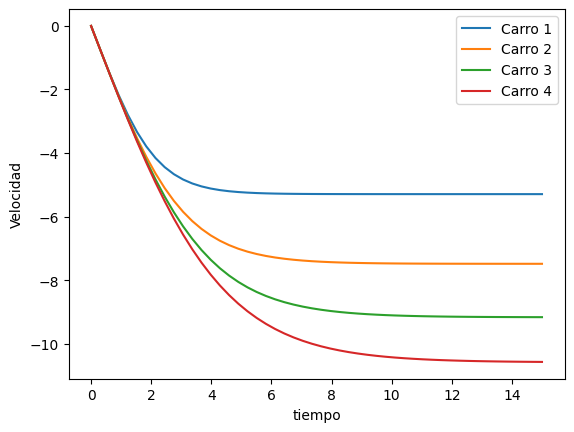

In [18]:
plt.plot(ts,vs[:,0],label="Carro 1")
plt.plot(ts,vs[:,1],label="Carro 2")
plt.plot(ts,vs[:,2],label="Carro 3")
plt.plot(ts,vs[:,3],label="Carro 4")
plt.legend()
plt.xlabel("tiempo")
plt.ylabel("Velocidad")

In [17]:
scypy


SyntaxError: expected ':' (4147019901.py, line 9)